#  📝 Evaluacion del Modulo 2 - "IA para profesionales TIC – 3ª edición"

#### 🪪 **Alumno**: Nicolas D'Alessandro

## 📝 Statement

### 🎯 Objetivo

El objetivo de este ejercicio es construir y entrenar una red neuronal convolucional (CNN) para clasificar imágenes de rostros humanos según las emociones que muestran. Los estudiantes aprenderán a trabajar con un dataset de imágenes, a construir y entrenar un modelo de CNN utilizando TensorFlow y Keras, y a evaluar su desempeño.

Podéis hacer uso de ChatGPT, Gemini, Github Copilot o cualquier otra herramienta, con un uso adecuado y siempre entendiendo lo que hacéis, y lo que el código hace.

Descripción del Ejercicio

En este ejercicio, utilizarás el dataset FER-2013 (Facial Expression Recognition) disponible en Kaggle. Este dataset contiene imágenes de rostros etiquetados con diferentes emociones (felicidad, tristeza, enojo, sorpresa, etc.). Tu tarea es entrenar una CNN para clasificar las imágenes de rostros en las categorías de emoción correctas.



### 🪜 Pasos a Seguir

#### 1. Preparación del Entorno:

- Abre un nuevo notebook en Google Colab.
- Asegúrate de tener instaladas las bibliotecas necesarias: TensorFlow, Keras, y otras bibliotecas auxiliares.

#### 2. Carga y Exploración del Dataset:

- Descarga el dataset FER-2013 desde Kaggle.
- Carga el dataset en tu notebook y explora las imágenes y sus etiquetas.

#### 3.Preprocesamiento de Datos:

- Realiza el preprocesamiento necesario de las imágenes, como el cambio de tamaño, la normalización y la división en conjuntos de entrenamiento y validación.

#### 4.Construcción del Modelo:

- Define una arquitectura de red neuronal convolucional utilizando Keras. Puedes empezar con una arquitectura simple y luego experimentar con arquitecturas más complejas.
- Compila el modelo especificando el optimizador, la función de pérdida y las métricas de evaluación.

#### 5. Entrenamiento del Modelo:

- Entrena tu modelo con el conjunto de entrenamiento.
- Evalúa el desempeño del modelo en el conjunto de validación.

#### 6. Evaluación y Mejora:

- Analiza los resultados y ajusta la arquitectura y los hiperparámetros del modelo para mejorar su precisión.
- Realiza predicciones sobre nuevas imágenes de rostros, busca rostros y ajústalos a lo que pide el modelo, y verifica su exactitud.

#### 7. Desafío Extra:

- Crear una visualización interactiva que muestre las emociones detectadas en tiempo real usando la webcam del ordenador (Google Colab, si buscáis, lo permite).

#### 8. A entregar en un .zip con vuestro nombre:

- Documenta todo el proceso en el notebook.
- Incluye gráficos de precisión y pérdida durante el entrenamiento.
- Muestra ejemplos de imágenes correctamente clasificadas y mal clasificadas.
- Comenta sobre los resultados obtenidos y las posibles mejoras o lo que consideres en un PDF.



### 🧪 Evaluación

La evaluación se basará en:

- La correcta implementación del modelo de CNN.
- La claridad y detalle en la documentación del proceso.
- La precisión del modelo en el conjunto de validación.
- La creatividad en la mejora del modelo y en el uso de técnicas de aumento de datos.


## Step 1️⃣: Preparing the Environment

### 1️⃣.0️⃣ Setup a propper Runtime

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Mon Feb 17 20:45:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA L4                      Off |   00000000:00:03.0 Off |                    0 |
| N/A   40C    P8             11W /   72W |       0MiB /  23034MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

### 1️⃣.1️⃣ Ensure we have installed the required libraries

In [7]:
!pip install tensorflow keras numpy matplotlib opencv-python

In [4]:
!pip install --upgrade kagglehub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 3.9 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.7
    Uninstalling kagglehub-0.3.7:
      Successfully uninstalled kagglehub-0.3.7


### 1️⃣.2️⃣ Import required Libraries

In [1]:
# Data Manipulation and Analysis
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Deep Learning Framework (TensorFlow & Keras)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization,
    GlobalAveragePooling2D
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Computer Vision (OpenCV)
import cv2

# File Handling and Directory Management
import os

# Kaggle API for Dataset Access
import kagglehub

❓ Explanation:

- **TensorFlow/Keras** → Libraries to build and train the CNN.
- **NumPy/Matplotlib** → Data manipulation and image visualization.
- **OpenCV** → Image processing.

## Step 2️⃣: Loading & Exploring the Dataset

### 2️⃣.1️⃣ Set the Path to the Files in Kagglehub and Load them

####🔹 Verify Dataset Path

In [8]:
# Download the latest version of the FER-2013 dataset
dataset_path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", dataset_path)
print("Files in dataset:", os.listdir(dataset_path))

Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1
Files in dataset: ['train', 'test']


## Step 3️⃣: Data Pre-processing

### 3️⃣.1️⃣ Verify Data Classes and Format

####🔹 Set Up Image Data Generators

In [8]:
# Image dimensions
img_size = (48, 48)
batch_size = 64

# Data augmentation for training images
train_datagen = ImageDataGenerator(
    rescale=1./255,         # Normalize pixel values (0-1)
    validation_split=0.2,   # 80% training, 20% validation
    rotation_range=10,      # Augmentation: small rotations
    zoom_range=0.1,         # Augmentation: zoom
    horizontal_flip=True    # Augmentation: flip images
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Load test data (without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


❓What’s happening?

- `rescale=1./255` → Normalizes pixel values from `[0,255]` to `[0,1]`.
- `validation_split=0.2` → Splits 20% for validation.
- Augmentations (rotation, zoom, flip) help prevent overfitting.

####🔹 Check Data Distribution

In [12]:
# View detected classes
print("Classes:", train_generator.class_indices)

Classes: {'angry': 0, 'disgust': 1, 'fear': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprise': 6}


####🔹 Verify Sample Images

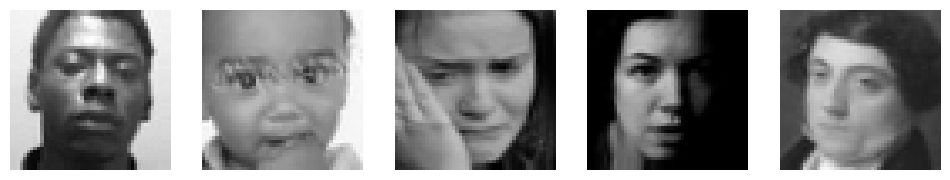

In [13]:
# Retrieve a batch of images
x_batch, y_batch = next(train_generator)

# Plot sample images
fig, axes = plt.subplots(1, 5, figsize=(12, 6))
for i, ax in enumerate(axes):
    ax.imshow(x_batch[i])
    ax.axis("off")
plt.show()

## 📌 **STEP 1, 2, 3 Conclusion**: Loading & Exploring the Dataset

We have the images organized into **7 kinds of emotions**:

| Class | Numeric Label |
|--------|----------------|
| **Angry** (Enojo) | 0 |
| **Disgust** (Disgusto) | 1 |
| **Fear** (Miedo) | 2 |
| **Happy** (Felicidad) | 3 |
| **Neutral** (Neutralidad) | 4 |
| **Sad** (Tristeza) | 5 |
| **Surprise** (Sorpresa) | 6 |

📌 **Dataset summary**:
- **Training**: **22,968 images** ✅
- **Validation**: **5,741 images** ✅
- **Test**: **7,178 images** ✅

### **✅ Summary of Steps Completed So Far**  

1️⃣ **Set Up the Environment**  
   - Installed required libraries (`tensorflow`, `keras`, `numpy`, `opencv`, `matplotlib`, `kagglehub`).  
   - Imported necessary Python modules.  

2️⃣ **Loaded the FER-2013 Dataset**  
   - Verified dataset structure (`train/`, `test/` folders with images per class).  
   - Listed class labels: **Angry, Disgust, Fear, Happy, Neutral, Sad, Surprise**.  

3️⃣ **Preprocessed & Augmented Data**  
   - Used `ImageDataGenerator` to load **images efficiently**.  
   - Applied **data augmentation**: rotations, zoom, and horizontal flips.  
   - **Normalized pixel values** (0-255 → 0-1).  
   - Split dataset: **80% training / 20% validation**.  

4️⃣ **Explored Data**  
   - Verified class distribution.  
   - Displayed **sample images** to confirm correct loading.
   

## Step 4️⃣: Build the CNN Architecture

### ℹ️ INFO: Key Considerations for the CNN Architecture

- **Feature Extraction**: Use **multiple convolutional layers** to extract patterns (edges, textures, shapes).  
- **Dimensionality Reduction**: Apply **MaxPooling layers** to reduce feature map size and computation cost.  
- **Fully Connected Layers**: Translate learned features into **emotion classification**.  
- **Regularization**: Use **Dropout layers** to **prevent overfitting**.  
- **Activation Functions**: Use **ReLU for hidden layers** and **Softmax for output (7 classes)**.

### 4️⃣.1️⃣ Define the CNN Model

#### ℹ️ Explanation of the Architecture

- **Feature Extraction**:
  - **3 convolutional blocks** with increasing filters (**64 → 128 → 256**).
  - **Batch Normalization** to stabilize training and speed up convergence.
  - **MaxPooling** to **reduce spatial dimensions**.

- **Classification Layers**:
  - **Flatten** layer converts feature maps into a single vector.
  - **2 Fully Connected (`Dense`) layers** with **Dropout** for regularization.
  - **Softmax output layer** (7 neurons) for **multi-class classification**.

- **Optimization & Loss Function**:
  - **Adam Optimizer** with a small **learning rate (0.0001)**.
  - **Categorical Cross-Entropy Loss** (since we have 7 classes).

In [30]:
# Define the CNN model
model = Sequential([
    # Convolutional Block 1
    Conv2D(64, (3,3), activation='relu', input_shape=(48,48,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Convolutional Block 2
    Conv2D(128, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Convolutional Block 3
    Conv2D(256, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),

    # Flattening Layer
    Flatten(),

    # Fully Connected Layer 1
    Dense(512, activation='relu'),
    Dropout(0.5),  # Regularization

    # Fully Connected Layer 2
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Output Layer (7 emotions)
    Dense(7, activation='softmax')
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Show model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 46, 46, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 46, 46, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 23, 23, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 21, 21, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 21, 21, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 10, 10, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 8, 8, 256)           │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │       2,097,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,603,399 (9.93 MB)

 Trainable params: 2,602,503 (9.93 MB)

 Non-trainable params: 896 (3.50 KB)

## 📌 **STEP 4 Conclusion**: Defining the CNN Model

### ❓ **What We Did?**

1️⃣ **Designed a Deep Convolutional Neural Network (CNN)**
   - Built a multi-layer CNN to classify facial emotions from images.  
   - Incorporated **Convolutional (Conv2D) layers** for feature extraction.  
   - Used **Batch Normalization** for stable and faster training.  
   - Applied **MaxPooling layers** to reduce dimensionality.  

2️⃣ **Added Fully Connected (Dense) Layers**
   - Flattened feature maps into a single vector (`Flatten`).  
   - **Dense layers (512 & 256 neurons)** learn complex patterns.  
   - Applied **Dropout (50%)** to prevent overfitting.  
   - Used **Softmax output layer (7 neurons)** for classification into 7 emotions.  

3️⃣ **Compiled the Model**
   - **Optimizer**: Adam (learning rate = 0.0001)  
   - **Loss Function**: Categorical Crossentropy  
   - **Metric**: Accuracy

###❓ **What Have We Obtained?**

✅ **Successfully Built a Deep CNN Model for Facial Emotion Recognition**  
- **Model Summary:**
  - **2.6M Trainable Parameters**  
  - **9.93MB total size**  
  - **3 Convolutional Blocks** with increasing filters (**64 → 128 → 256**)  
  - **MaxPooling layers** for size reduction  
  - **Dense layers (512, 256 neurons)** with Dropout (50%)

## Step 5️⃣: Training the CNN Model & Evaluating Performance

#### ℹ️ INFO: Key Considerations Before Training

- **How do we ensure a robust training process?**  
  - **Monitor Model Performance**: Track accuracy and loss over epochs.  
  - **Prevent Overfitting**: Use **early stopping** and **learning rate reduction**.  
  - **Efficient Training**: Utilize **GPU acceleration** in Colab for faster computation.

### 5️⃣.1️⃣ Define Callbacks for Efficient Training

####❓ We'll use **callbacks** to optimize training dynamically:

  - **EarlyStopping**: Stops training when validation loss stops improving.  
  - **ReduceLROnPlateau**: Reduces the learning rate if validation loss stagnates.

#### ❓ **Why?**
- **Stops training early** to avoid overfitting.  
- **Reduces learning rate** dynamically for fine-tuned adjustments.

In [37]:
# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss', patience=5, restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6
)

checkpoint = ModelCheckpoint(
    "best_model.h5", monitor="val_loss", save_best_only=True, verbose=1
)

callbacks = [early_stopping, reduce_lr, checkpoint]

### 5️⃣.2️⃣ Train the **CNN** Model
Now, we train the model using the **training dataset (`train_generator`)** and evaluate on **validation data (`val_generator`)**.

In [40]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,  # Optimized number of epochs
    batch_size = 64,  # Defined previously in ImageDataGenerator
    callbacks=callbacks  # Use defined callbacks
)

Epoch 1/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3366 - loss: 1.6956
Epoch 1: val_loss improved from inf to 1.58726, saving model to best_model.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 412s 1s/step - accuracy: 0.3366 - loss: 1.6956 - val_accuracy: 0.3870 - val_loss: 1.5873 - learning_rate: 1.0000e-04
Epoch 2/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3626 - loss: 1.6244
Epoch 2: val_loss improved from 1.58726 to 1.52033, saving model to best_model.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 397s 1s/step - accuracy: 0.3626 - loss: 1.6244 - val_accuracy: 0.4170 - val_loss: 1.5203 - learning_rate: 1.0000e-04
Epoch 3/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3840 - loss: 1.5866
Epoch 3: val_loss improved from 1.52033 to 1.48530, saving model to best_model.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 387s 1s/step - accuracy: 0.3840 - loss: 1.5866 - val_accuracy: 0.4313 - val_loss: 1.4853 - learning_rate: 1.0000e-04
Epoch 4/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4030 - loss: 1.5404
Epoch 4: val_loss improved from 1.48530 to 1.46726, saving model to best_model.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 397s 1s/step - accuracy: 0.4030 - loss: 1.5404 - val_accuracy: 0.4393 - val_loss: 1.4673 - learning_rate: 1.0000e-04
Epoch 5/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4214 - loss: 1.5026
Epoch 5: val_loss improved from 1.46726 to 1.43382, saving model to best_model.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 417s 1s/step - accuracy: 0.4213 - loss: 1.5027 - val_accuracy: 0.4520 - val_loss: 1.4338 - learning_rate: 1.0000e-04
Epoch 6/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4352 - loss: 1.4650
Epoch 6: val_loss did not improve from 1.43382
359/359 ━━━━━━━━━━━━━━━━━━━━ 435s 1s/step - accuracy: 0.4352 - loss: 1.4650 - val_accuracy: 0.4477 - val_loss: 1.4385 - learning_rate: 1.0000e-04
Epoch 7/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4467 - loss: 1.4476
Epoch 7: val_loss improved from 1.43382 to 1.41381, saving model to best_model.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 412s 1s/step - accuracy: 0.4467 - loss: 1.4476 - val_accuracy: 0.4531 - val_loss: 1.4138 - learning_rate: 1.0000e-04
Epoch 8/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4475 - loss: 1.4373
Epoch 8: val_loss improved from 1.41381 to 1.37501, saving model to best_model.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.4475 - loss: 1.4373 - val_accuracy: 0.4837 - val_loss: 1.3750 - learning_rate: 1.0000e-04
Epoch 9/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4735 - loss: 1.4004
Epoch 9: val_loss improved from 1.37501 to 1.35054, saving model to best_model.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 395s 1s/step - accuracy: 0.4735 - loss: 1.4004 - val_accuracy: 0.4828 - val_loss: 1.3505 - learning_rate: 1.0000e-04
Epoch 10/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4760 - loss: 1.3739
Epoch 10: val_loss improved from 1.35054 to 1.32422, saving model to best_model.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 396s 1s/step - accuracy: 0.4760 - loss: 1.3739 - val_accuracy: 0.4994 - val_loss: 1.3242 - learning_rate: 1.0000e-04
Epoch 11/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4919 - loss: 1.3338
Epoch 11: val_loss improved from 1.32422 to 1.32118, saving model to best_model.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 398s 1s/step - accuracy: 0.4919 - loss: 1.3338 - val_accuracy: 0.5050 - val_loss: 1.3212 - learning_rate: 1.0000e-04
Epoch 12/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5020 - loss: 1.3138
Epoch 12: val_loss did not improve from 1.32118
359/359 ━━━━━━━━━━━━━━━━━━━━ 395s 1s/step - accuracy: 0.5020 - loss: 1.3138 - val_accuracy: 0.4980 - val_loss: 1.3351 - learning_rate: 1.0000e-04
Epoch 13/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4997 - loss: 1.3157
Epoch 13: val_loss improved from 1.32118 to 1.28444, saving model to best_model.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 399s 1s/step - accuracy: 0.4997 - loss: 1.3157 - val_accuracy: 0.5086 - val_loss: 1.2844 - learning_rate: 1.0000e-04
Epoch 14/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5092 - loss: 1.2884
Epoch 14: val_loss did not improve from 1.28444
359/359 ━━━━━━━━━━━━━━━━━━━━ 393s 1s/step - accuracy: 0.5092 - loss: 1.2884 - val_accuracy: 0.5060 - val_loss: 1.3067 - learning_rate: 1.0000e-04
Epoch 15/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5118 - loss: 1.2800
Epoch 15: val_loss did not improve from 1.28444
359/359 ━━━━━━━━━━━━━━━━━━━━ 411s 1s/step - accuracy: 0.5118 - loss: 1.2800 - val_accuracy: 0.5142 - val_loss: 1.2972 - learning_rate: 1.0000e-04


### 5️⃣.3️⃣ Evaluate Model Performance

- After training, we analyze its performance on the **validation set**.

In [41]:
# Evaluate the model on validation data
val_loss, val_acc = model.evaluate(val_generator)
print(f"📊 Validation Accuracy: {val_acc:.4f}")
print(f"📉 Validation Loss: {val_loss:.4f}")

90/90 ━━━━━━━━━━━━━━━━━━━━ 24s 265ms/step - accuracy: 0.5153 - loss: 1.2757
📊 Validation Accuracy: 0.5170
📉 Validation Loss: 1.2717


### 5️⃣.4️⃣ Visualize Training Progress

- We plot **accuracy** and **loss** curves to assess model performance.


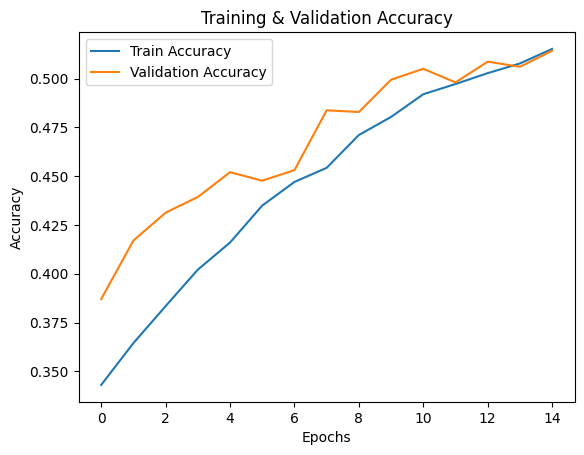

In [42]:
# Accuracy plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Training & Validation Accuracy")
plt.show()

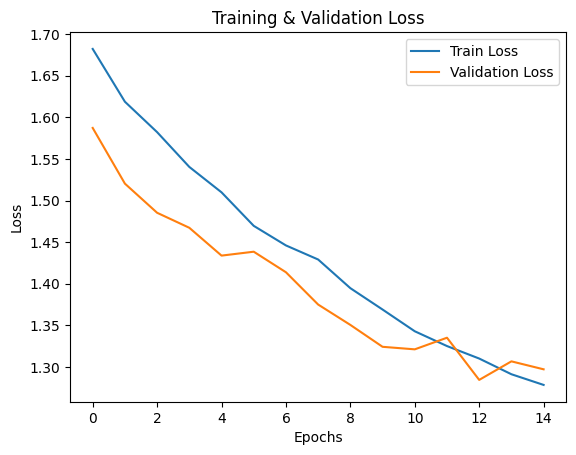

In [43]:
# Loss plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training & Validation Loss")
plt.show()

## 📌 **STEP 5 Conclusion**:  Final Training Analysis & Model Performance

### ❓ **What We Did?**  

1️⃣ **Set Callbacks** (`EarlyStopping` & `ReduceLROnPlateau`) to optimize training.  
2️⃣ **Trained the CNN** using `train_generator` (images) and validated with `val_generator`.  
3️⃣ **Evaluated model performance** on the validation set.  
4️⃣ **Plotted accuracy and loss curves** to visualize training progress.

### **🔹 Concerns**
⚠️ **Validation Accuracy (~51%) is still low.**  
- This suggests the model **may not be complex enough** to fully capture the patterns in facial emotions.  
- The dataset is likely **challenging**, and additional improvements might be needed.  

_____

In [20]:
import tensorflow as tf
import os
from kagglehub import dataset_download
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2

In [11]:
# Download the latest version of the FER-2013 dataset
dataset_path = dataset_download("msambare/fer2013")

print("Path to dataset files:", dataset_path)
print("Files in dataset:", os.listdir(dataset_path))

Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1
Files in dataset: ['train', 'test']


In [12]:
# Image dimensions
img_size = (48, 48)
batch_size = 64

# Define ImageDataGenerator for Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    validation_split=0.2
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training"
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation"
)

# Load test data (without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical"
)

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [15]:
# Define an improved CNN architecture
model = Sequential([
    Input(shape=(48,48,3)),
    Conv2D(64, (3,3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.3),

    Conv2D(256, (3,3), activation='relu', padding='same', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    MaxPooling2D((2,2)),
    Dropout(0.4),

    Flatten(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

In [16]:
# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# Define callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint("best_emotion_cnn.h5", save_best_only=True, monitor='val_loss', verbose=1)

In [25]:
# Train the model
epochs = 30
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    callbacks=[lr_scheduler, early_stopping, model_checkpoint]
)

Epoch 1/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2443 - loss: 2.8862
Epoch 1: val_loss improved from inf to 2.49690, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 91ms/step - accuracy: 0.2443 - loss: 2.8858 - val_accuracy: 0.2674 - val_loss: 2.4969 - learning_rate: 0.0010
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2782 - loss: 2.3884
Epoch 2: val_loss improved from 2.49690 to 2.35978, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.2782 - loss: 2.3883 - val_accuracy: 0.2540 - val_loss: 2.3598 - learning_rate: 0.0010
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.3135 - loss: 2.2070
Epoch 3: val_loss improved from 2.35978 to 2.35263, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.3135 - loss: 2.2070 - val_accuracy: 0.2879 - val_loss: 2.3526 - learning_rate: 0.0010
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3405 - loss: 2.2205
Epoch 4: val_loss did not improve from 2.35263
359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 0.3406 - loss: 2.2205 - val_accuracy: 0.1803 - val_loss: 2.6458 - learning_rate: 0.0010
Epoch 5/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3645 - loss: 2.1984
Epoch 5: val_loss improved from 2.35263 to 2.30495, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.3645 - loss: 2.1985 - val_accuracy: 0.3729 - val_loss: 2.3050 - learning_rate: 0.0010
Epoch 6/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3894 - loss: 2.2087
Epoch 6: val_loss did not improve from 2.30495
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.3894 - loss: 2.2087 - val_accuracy: 0.2930 - val_loss: 2.3339 - learning_rate: 0.0010
Epoch 7/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4012 - loss: 2.1774
Epoch 7: val_loss did not improve from 2.30495
359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.4011 - loss: 2.1776 - val_accuracy: 0.2984 - val_loss: 2.5419 - learning_rate: 0.0010
Epoch 8/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.3854 - loss: 2.3788
Epoch 8: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 8: val_loss did not improve from 2.30495
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.3854 - loss: 2.3787 - val_accuracy:

359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.4232 - loss: 2.2197 - val_accuracy: 0.4233 - val_loss: 2.0624 - learning_rate: 5.0000e-04
Epoch 10/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4385 - loss: 2.0071
Epoch 10: val_loss improved from 2.06239 to 1.89361, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.4385 - loss: 2.0071 - val_accuracy: 0.4734 - val_loss: 1.8936 - learning_rate: 5.0000e-04
Epoch 11/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4481 - loss: 1.9351
Epoch 11: val_loss did not improve from 1.89361
359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.4481 - loss: 1.9351 - val_accuracy: 0.3146 - val_loss: 2.3201 - learning_rate: 5.0000e-04
Epoch 12/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4584 - loss: 1.9135
Epoch 12: val_loss improved from 1.89361 to 1.85447, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.4584 - loss: 1.9135 - val_accuracy: 0.4809 - val_loss: 1.8545 - learning_rate: 5.0000e-04
Epoch 13/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4670 - loss: 1.8943
Epoch 13: val_loss did not improve from 1.85447
359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 0.4670 - loss: 1.8943 - val_accuracy: 0.4377 - val_loss: 1.9615 - learning_rate: 5.0000e-04
Epoch 14/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4602 - loss: 1.9006
Epoch 14: val_loss did not improve from 1.85447
359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 0.4602 - loss: 1.9007 - val_accuracy: 0.4234 - val_loss: 2.0217 - learning_rate: 5.0000e-04
Epoch 15/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4637 - loss: 1.9112
Epoch 15: ReduceLROnPlateau reducing learning rate to 0.0002500000118743628.

Epoch 15: val_loss did not improve from 1.85447
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.4638 - loss: 1.9

359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.4783 - loss: 1.8750 - val_accuracy: 0.5030 - val_loss: 1.7326 - learning_rate: 2.5000e-04
Epoch 17/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4941 - loss: 1.7529
Epoch 17: val_loss improved from 1.73257 to 1.73059, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.4941 - loss: 1.7529 - val_accuracy: 0.4931 - val_loss: 1.7306 - learning_rate: 2.5000e-04
Epoch 18/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5018 - loss: 1.7106
Epoch 18: val_loss improved from 1.73059 to 1.63947, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.5018 - loss: 1.7106 - val_accuracy: 0.5206 - val_loss: 1.6395 - learning_rate: 2.5000e-04
Epoch 19/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5033 - loss: 1.6762
Epoch 19: val_loss improved from 1.63947 to 1.61138, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.5033 - loss: 1.6763 - val_accuracy: 0.5231 - val_loss: 1.6114 - learning_rate: 2.5000e-04
Epoch 20/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.4997 - loss: 1.6850
Epoch 20: val_loss did not improve from 1.61138
359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.4997 - loss: 1.6850 - val_accuracy: 0.4994 - val_loss: 1.6687 - learning_rate: 2.5000e-04
Epoch 21/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.4964 - loss: 1.6693
Epoch 21: val_loss did not improve from 1.61138
359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 0.4964 - loss: 1.6692 - val_accuracy: 0.5037 - val_loss: 1.6687 - learning_rate: 2.5000e-04
Epoch 22/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5047 - loss: 1.6634
Epoch 22: val_loss improved from 1.61138 to 1.59607, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.5048 - loss: 1.6633 - val_accuracy: 0.5187 - val_loss: 1.5961 - learning_rate: 2.5000e-04
Epoch 23/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5022 - loss: 1.6572
Epoch 23: val_loss did not improve from 1.59607
359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 87ms/step - accuracy: 0.5022 - loss: 1.6572 - val_accuracy: 0.5271 - val_loss: 1.5974 - learning_rate: 2.5000e-04
Epoch 24/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5136 - loss: 1.6297
Epoch 24: val_loss improved from 1.59607 to 1.58312, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.5136 - loss: 1.6297 - val_accuracy: 0.5327 - val_loss: 1.5831 - learning_rate: 2.5000e-04
Epoch 25/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5188 - loss: 1.6335
Epoch 25: val_loss improved from 1.58312 to 1.56269, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.5188 - loss: 1.6335 - val_accuracy: 0.5419 - val_loss: 1.5627 - learning_rate: 2.5000e-04
Epoch 26/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5135 - loss: 1.6195
Epoch 26: val_loss did not improve from 1.56269
359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 0.5135 - loss: 1.6195 - val_accuracy: 0.5236 - val_loss: 1.5855 - learning_rate: 2.5000e-04
Epoch 27/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.5165 - loss: 1.6107
Epoch 27: val_loss improved from 1.56269 to 1.56126, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 88ms/step - accuracy: 0.5165 - loss: 1.6107 - val_accuracy: 0.5360 - val_loss: 1.5613 - learning_rate: 2.5000e-04
Epoch 28/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5192 - loss: 1.6049
Epoch 28: val_loss did not improve from 1.56126
359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 0.5192 - loss: 1.6049 - val_accuracy: 0.5325 - val_loss: 1.5751 - learning_rate: 2.5000e-04
Epoch 29/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.5152 - loss: 1.6079
Epoch 29: val_loss improved from 1.56126 to 1.53240, saving model to best_emotion_cnn.h5


359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 90ms/step - accuracy: 0.5152 - loss: 1.6079 - val_accuracy: 0.5464 - val_loss: 1.5324 - learning_rate: 2.5000e-04
Epoch 30/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.5195 - loss: 1.6065
Epoch 30: val_loss did not improve from 1.53240
359/359 ━━━━━━━━━━━━━━━━━━━━ 31s 88ms/step - accuracy: 0.5195 - loss: 1.6065 - val_accuracy: 0.5414 - val_loss: 1.5574 - learning_rate: 2.5000e-04
Restoring model weights from the end of the best epoch: 29.


In [27]:
# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Save final model
model.save("emotion_cnn_improved.keras")

113/113 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5866 - loss: 1.4048
Test Accuracy: 0.5766


_____

In [29]:
import tensorflow as tf
import os
import numpy as np
from kagglehub import dataset_download
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.regularizers import l2
from tensorflow.keras.applications import VGG16
from sklearn.utils import class_weight

# Download the latest version of the FER-2013 dataset
dataset_path = dataset_download("msambare/fer2013")

print("Path to dataset files:", dataset_path)
print("Files in dataset:", os.listdir(dataset_path))

# Image dimensions
img_size = (48, 48)
batch_size = 64

# Define ImageDataGenerator for Enhanced Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    zoom_range=0.3,
    shear_range=0.3,
    validation_split=0.2
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

# Load test data (without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# Compute class weights for handling imbalanced data
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Load Pretrained Model (VGG16) for Transfer Learning
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
for layer in base_model.layers[:-5]:
    layer.trainable = False

# Define an improved CNN architecture with Transfer Learning
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model with a lower learning rate
optimizer = RMSprop(learning_rate=0.0005)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint("best_emotion_cnn.keras", save_best_only=True, monitor='val_loss', verbose=1)

# Train the model with class weights
epochs = 30
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[lr_scheduler, early_stopping, model_checkpoint],
    verbose=1
)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Save final model
model.save("emotion_cnn_improved.keras")

Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1
Files in dataset: ['train', 'test']
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.1880 - loss: 2.5962
Epoch 1: val_loss improved from inf to 4.55887, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 39s 99ms/step - accuracy: 0.1881 - loss: 2.5956 - val_accuracy: 0.2625 - val_loss: 4.5589 - learning_rate: 5.0000e-04
Epoch 2/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2417 - loss: 2.0313
Epoch 2: val_loss improved from 4.55887 to 3.23369, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 90ms/step - accuracy: 0.2418 - loss: 2.0312 - val_accuracy: 0.2714 - val_loss: 3.2337 - learning_rate: 5.0000e-04
Epoch 3/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2737 - loss: 1.8596
Epoch 3: val_loss did not improve from 3.23369
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.2737 - loss: 1.8595 - val_accuracy: 0.2534 - val_loss: 5.5233 - learning_rate: 5.0000e-04
Epoch 4/30
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.2928 - loss: 1.79

____

In [30]:
import tensorflow as tf
import os
import numpy as np
from kagglehub import dataset_download
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from sklearn.utils import class_weight

# Download the latest version of the FER-2013 dataset
dataset_path = dataset_download("msambare/fer2013")

print("Path to dataset files:", dataset_path)
print("Files in dataset:", os.listdir(dataset_path))

# Image dimensions
img_size = (48, 48)
batch_size = 64

# Define ImageDataGenerator for Enhanced Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    zoom_range=0.3,
    shear_range=0.3,
    validation_split=0.2
)

# Load training and validation data
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=True
)

# Load test data (without augmentation)
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

# Compute class weights for handling imbalanced data
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Define an improved CNN architecture
model = Sequential([
    Input(shape=(48,48,3)),
    Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    Conv2D(64, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((3,3), strides=(2,2)),
    Dropout(0.25),

    Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    Conv2D(128, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((3,3), strides=(2,2)),
    Dropout(0.25),

    Conv2D(256, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    Conv2D(256, (3,3), activation='relu', padding='same', kernel_initializer='he_normal'),
    BatchNormalization(),
    MaxPooling2D((3,3), strides=(2,2)),
    Dropout(0.5),

    Flatten(),
    Dense(2048, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint("best_emotion_cnn.keras", save_best_only=True, monitor='val_loss', verbose=1)

# Train the model with class weights
epochs = 50
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[lr_scheduler, early_stopping, model_checkpoint],
    verbose=1
)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Save final model
model.save("emotion_cnn_improved.keras")

Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1
Files in dataset: ['train', 'test']
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.1577 - loss: 4.9184
Epoch 1: val_loss improved from inf to 9.08683, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 54s 121ms/step - accuracy: 0.1577 - loss: 4.9098 - val_accuracy: 0.0293 - val_loss: 9.0868 - learning_rate: 1.0000e-04
Epoch 2/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.1656 - loss: 1.9976
Epoch 2: val_loss improved from 9.08683 to 2.43642, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 33s 92ms/step - accuracy: 0.1656 - loss: 1.9976 - val_accuracy: 0.1578 - val_loss: 2.4364 - learning_rate: 1.0000e-04
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - accuracy: 0.1580 - loss: 1.9758
Epoch 3: val_loss did not improve from 2.43642
359/359 ━━━━━━━━━━━━━━━━━━━━ 32s 89ms/step - accuracy: 0.1580 - loss: 1.9758 - val_accuracy: 0.1202 - val_loss: 2.5742 - learning_rate: 1.0000e-04
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.1552 - loss: 1.9

____

In [33]:
import tensorflow as tf
import os
import numpy as np
from kagglehub import dataset_download
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.initializers import RandomNormal
from sklearn.utils import class_weight

# Download the latest version of the FER-2013 dataset
dataset_path = dataset_download("msambare/fer2013")

print("Path to dataset files:", dataset_path)
print("Files in dataset:", os.listdir(dataset_path))

# Image dimensions
img_size = (48, 48)
batch_size = 64

# Define ImageDataGenerator for Enhanced Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.05,
    validation_split=0.2
)

# Load training and validation data in grayscale
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",  # Convert images to grayscale
    subset="training",
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",  # Convert images to grayscale
    subset="validation",
    shuffle=True
)

# Load test data (without augmentation) in grayscale
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",  # Convert images to grayscale
    shuffle=False
)

# Compute class weights for handling imbalanced data
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Define an improved CNN architecture based on Best_model.ipynb
model = Sequential()

# 1st convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(48,48,1), bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.25))

# 2nd convolution layer
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.25))

# 3rd convolution layer
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.25))

# 4th convolution layer
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', bias_initializer=RandomNormal(stddev=1), kernel_initializer=RandomNormal(stddev=1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3,3), strides=(2, 2)))
model.add(Dropout(0.5))

# Fully connected layers
model.add(Flatten())
model.add(Dense(2048, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint("best_emotion_cnn.keras", save_best_only=True, monitor='val_loss', verbose=1)

# Train the model with class weights
epochs = 300
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[lr_scheduler, early_stopping, model_checkpoint],
    verbose=1
)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Save final model
model.save("emotion_cnn_improved.keras")

Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1
Files in dataset: ['train', 'test']
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/300


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1486 - loss: 3.5732
Epoch 1: val_loss improved from inf to 1.94612, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.1486 - loss: 3.5670 - val_accuracy: 0.1982 - val_loss: 1.9461 - learning_rate: 0.0010
Epoch 2/300
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1540 - loss: 1.9652
Epoch 2: val_loss did not improve from 1.94612
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.1539 - loss: 1.9652 - val_accuracy: 0.1789 - val_loss: 2.0176 - learning_rate: 0.0010
Epoch 3/300
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accuracy: 0.1273 - loss: 1.9527
Epoch 3: val_loss did not improve from 1.94612
359/359 ━━━━━━━━━━━━━━━━━━━━ 19s 54ms/step - accuracy: 0.1273 - loss: 1.9527 - val_accuracy: 0.1829 - val_loss: 2.0551 - learning_rate: 0.0010
Epoch 4/300
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1365 - loss: 1.9380
Epoch 4: ReduceLROnPlateau reducing learning rate 

In [35]:
import tensorflow as tf
import os
import numpy as np
from kagglehub import dataset_download
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.initializers import HeNormal
from sklearn.utils import class_weight

# Download the latest version of the FER-2013 dataset
dataset_path = dataset_download("msambare/fer2013")

print("Path to dataset files:", dataset_path)
print("Files in dataset:", os.listdir(dataset_path))

# Image dimensions
img_size = (48, 48)
batch_size = 64

# Define ImageDataGenerator with Adjusted Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Reduced rotation
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,  # Reduced zoom
    validation_split=0.2
)

# Load training and validation data in grayscale
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    subset="training",
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    subset="validation",
    shuffle=True
)

# Load test data (without augmentation) in grayscale
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    shuffle=False
)

# Compute class weights for handling imbalanced data
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Define Improved CNN Architecture with Adjustments
model = Sequential()

# 1st convolution layer
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=HeNormal(), input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2nd convolution layer
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# 3rd convolution layer
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile the model with a lower learning rate
optimizer = Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint("best_emotion_cnn.keras", save_best_only=True, monitor='val_loss', verbose=1)

# Train the model with class weights
epochs = 100
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[lr_scheduler, early_stopping, model_checkpoint],
    verbose=1
)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Save final model
model.save("emotion_cnn_improved.keras")

Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1
Files in dataset: ['train', 'test']
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step - accuracy: 0.1703 - loss: 2.5496
Epoch 1: val_loss improved from inf to 1.99240, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 40s 79ms/step - accuracy: 0.1703 - loss: 2.5491 - val_accuracy: 0.1331 - val_loss: 1.9924 - learning_rate: 3.0000e-04
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.1991 - loss: 2.0747
Epoch 2: val_loss improved from 1.99240 to 1.90109, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 56ms/step - accuracy: 0.1991 - loss: 2.0746 - val_accuracy: 0.2088 - val_loss: 1.9011 - learning_rate: 3.0000e-04
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.2309 - loss: 1.9361
Epoch 3: val_loss improved from 1.90109 to 1.79929, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 20s 57ms/step - accuracy: 0.2309 - loss: 1.9362 - val_accuracy: 0.2898 - val_loss: 1.7993 - learning_rate: 3.0000e-04
Epoch 4/100
358/359 ━━━━━━━━━━━━━━━━━━

In [36]:
import tensorflow as tf
import os
import numpy as np
from kagglehub import dataset_download
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.initializers import HeNormal
from sklearn.utils import class_weight

# Download the latest version of the FER-2013 dataset
dataset_path = dataset_download("msambare/fer2013")

print("Path to dataset files:", dataset_path)
print("Files in dataset:", os.listdir(dataset_path))

# Image dimensions
img_size = (48, 48)
batch_size = 64

# Define ImageDataGenerator with Augmentation for Robust Training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,  # Increased rotation for better variation
    width_shift_range=0.15,
    height_shift_range=0.15,
    horizontal_flip=True,
    zoom_range=0.15,
    brightness_range=[0.8, 1.2],  # Adjust brightness for more generalization
    validation_split=0.2
)

# Load training and validation data in grayscale
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    subset="training",
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    subset="validation",
    shuffle=True
)

# Load test data (without augmentation) in grayscale
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    shuffle=False
)

# Compute class weights for handling imbalanced data
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Define an Improved CNN Model with Regularization
model = Sequential()

# 1st convolution block
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001), input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# 2nd convolution block
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# 3rd convolution block
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# 4th convolution block (NEW Layer for More Depth)
model.add(Conv2D(512, (3, 3), padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.0001)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Learning rate scheduler (Exponential Decay)
lr_schedule = ExponentialDecay(initial_learning_rate=0.0003, decay_steps=10000, decay_rate=0.9)
optimizer = Adam(learning_rate=lr_schedule)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint("best_emotion_cnn.keras", save_best_only=True, monitor='val_loss', verbose=1)

# Train the model with class weights
epochs = 100
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, model_checkpoint],
    verbose=1
)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Save final model
model.save("emotion_cnn_improved.keras")

Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1
Files in dataset: ['train', 'test']
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step - accuracy: 0.1450 - loss: 3.1788
Epoch 1: val_loss improved from inf to 2.65162, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 50s 98ms/step - accuracy: 0.1450 - loss: 3.1781 - val_accuracy: 0.0369 - val_loss: 2.6516
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1588 - loss: 2.6089
Epoch 2: val_loss improved from 2.65162 to 2.21776, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 26s 71ms/step - accuracy: 0.1588 - loss: 2.6087 - val_accuracy: 0.2174 - val_loss: 2.2178
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.1640 - loss: 2.4480
Epoch 3: val_loss did not improve from 2.21776
359/359 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.1640 - loss: 2.4480 - val_accuracy: 0.0759 - val_loss: 2.3211
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.1692 - loss: 2.4305
Epoch 4: val_loss improved from 2.21776 to 2.17819, saving model to best_emoti

In [37]:
import tensorflow as tf
import os
import numpy as np
from kagglehub import dataset_download
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.initializers import HeNormal
from sklearn.utils import class_weight

# Download the latest version of the FER-2013 dataset
dataset_path = dataset_download("msambare/fer2013")

print("Path to dataset files:", dataset_path)
print("Files in dataset:", os.listdir(dataset_path))

# Image dimensions
img_size = (48, 48)
batch_size = 64

# Define ImageDataGenerator with Optimized Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Balanced rotation
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1,  # Reduced zoom
    brightness_range=[0.9, 1.1],  # Reduced brightness variation
    validation_split=0.2
)

# Load training and validation data in grayscale
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    subset="training",
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    subset="validation",
    shuffle=True
)

# Load test data (without augmentation) in grayscale
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    shuffle=False
)

# Compute class weights for handling imbalanced data
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Define Improved CNN Model with Adjustments
model = Sequential()

# 1st convolution block
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.00005), input_shape=(48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.00005)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 2nd convolution block
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.00005)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.00005)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# 3rd convolution block
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.00005)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=HeNormal(), kernel_regularizer=l2(0.00005)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Learning rate scheduler with ReduceLROnPlateau
optimizer = Adam(learning_rate=0.0003)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint("best_emotion_cnn.keras", save_best_only=True, monitor='val_loss', verbose=1)

# Train the model with class weights
epochs = 100
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[lr_scheduler, early_stopping, model_checkpoint],
    verbose=1
)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Save final model
model.save("emotion_cnn_improved.keras")

Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1
Files in dataset: ['train', 'test']
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step - accuracy: 0.1639 - loss: 2.6336
Epoch 1: val_loss improved from inf to 2.03282, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 46s 94ms/step - accuracy: 0.1640 - loss: 2.6331 - val_accuracy: 0.2090 - val_loss: 2.0328 - learning_rate: 3.0000e-04
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2058 - loss: 2.1711
Epoch 2: val_loss improved from 2.03282 to 1.91542, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 26s 72ms/step - accuracy: 0.2058 - loss: 2.1711 - val_accuracy: 0.2555 - val_loss: 1.9154 - learning_rate: 3.0000e-04
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2312 - loss: 2.0901
Epoch 3: val_loss did not improve from 1.91542
359/359 ━━━━━━━━━━━━━━━━━━━━ 25s 70ms/step - accuracy: 0.2313 - loss: 2.0900 - val_accuracy: 0.2066 - val_loss: 1.9691 - learning_rate: 3.0000e-04
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.2821 - loss: 1

In [40]:
import tensorflow as tf
import os
import numpy as np
from kagglehub import dataset_download
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization, Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.initializers import HeNormal
from sklearn.utils import class_weight

# Download the latest version of the FER-2013 dataset
dataset_path = dataset_download("msambare/fer2013")

print("Path to dataset files:", dataset_path)
print("Files in dataset:", os.listdir(dataset_path))

# Image dimensions (Increased to 64x64 for better feature extraction)
img_size = (64, 64)
batch_size = 64

# Define ImageDataGenerator with Enhanced Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    validation_split=0.2
)

# Load training and validation data in grayscale
train_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    subset="training",
    shuffle=True
)

val_generator = train_datagen.flow_from_directory(
    os.path.join(dataset_path, "train"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    subset="validation",
    shuffle=True
)

# Load test data (without augmentation) in grayscale
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    os.path.join(dataset_path, "test"),
    target_size=img_size,
    batch_size=batch_size,
    class_mode="categorical",
    color_mode="grayscale",
    shuffle=False
)

# Compute class weights for handling imbalanced data
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(train_generator.classes),
    y=train_generator.classes
)
class_weights_dict = dict(enumerate(class_weights))

# Define Enhanced CNN Model
model = Sequential()

# 1st convolution block
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer=HeNormal(), input_shape=(64,64,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

# 2nd convolution block
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# 3rd convolution block
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

# 4th convolution block (Added for feature extraction)
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding='same', kernel_initializer=HeNormal()))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

# Fully connected layers
model.add(Flatten())
model.add(Dense(512, activation='relu', kernel_initializer=HeNormal()))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Compile Model with RMSprop
optimizer = RMSprop(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True, verbose=1)
model_checkpoint = ModelCheckpoint("best_emotion_cnn.keras", save_best_only=True, monitor='val_loss', verbose=1)

# Train the model with class weights
epochs = 100
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=val_generator,
    class_weight=class_weights_dict,
    callbacks=[lr_scheduler, early_stopping, model_checkpoint],
    verbose=1
)

# Evaluate model on test set
test_loss, test_acc = model.evaluate(test_generator, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

# Save final model
model.save("emotion_cnn_improved.keras")

Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1
Files in dataset: ['train', 'test']
Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.1503 - loss: 2.9070
Epoch 1: val_loss improved from inf to 2.01130, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 52s 111ms/step - accuracy: 0.1503 - loss: 2.9068 - val_accuracy: 0.2230 - val_loss: 2.0113 - learning_rate: 1.0000e-04
Epoch 2/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1592 - loss: 2.5697
Epoch 2: val_loss improved from 2.01130 to 1.99542, saving model to best_emotion_cnn.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.1592 - loss: 2.5696 - val_accuracy: 0.1761 - val_loss: 1.9954 - learning_rate: 1.0000e-04
Epoch 3/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1587 - loss: 2.4192
Epoch 3: val_loss did not improve from 1.99542
359/359 ━━━━━━━━━━━━━━━━━━━━ 29s 80ms/step - accuracy: 0.1588 - loss: 2.4189 - val_accuracy: 0.1113 - val_loss: 2.0749 - learning_rate: 1.0000e-04
Epoch 4/100
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - accuracy: 0.1675 - loss: 